# Исследование надежности заемщиков


## Откройте таблицу и изучите общую информацию о данных

**Цель исследования** — выяснить, влияет ли семейное положение и количество детей клиента на факт погашения кредита в срок.

Данные для исследования предоставлены банком и включают в себя информацию о платежеспособности клиентов, такую как количество детей в семье, общий трудовой стаж в днях, возраст клиента в годах, уровень образования, идентификатор уровня образования, семейное положение, идентификатор семейного положения, пол клиента, тип занятости, имел ли задолженность по возврату кредитов, ежемесячный доход и цель получения кредита.

**План работы:**

1. Ознакомление с данными: оценить объем данных, проверить наличие пропущенных значений, оценить качество данных.
2. Предварительный анализ данных: определить статистические показатели для каждой переменной, провести визуализацию данных.
3. Обработка данных: заполнить пропущенные значения, удалить дубликаты, привести данные к нужному формату.
4. Анализ данных: определить влияние семейного положения и количества детей клиента на факт погашения кредита в срок.
5. Выводы: сформулировать выводы и рекомендации на основе результатов анализа.

Заказчик — кредитный отдел банка. Нужно разобраться, влияет ли семейное положение и количество детей клиента на факт погашения кредита в срок. Входные данные от банка — статистика о платёжеспособности клиентов.
###### Результаты исследования будут учтены при построении модели кредитного скоринга — специальной системы, которая оценивает способность потенциального заёмщика вернуть кредит банку.

# *Описание данных*
- children — количество детей в семье
- days_employed — общий трудовой стаж в днях
- dob_years — возраст клиента в годах
- education — уровень образования клиента
- education_id — идентификатор уровня образования
- family_status — семейное положение
- family_status_id — идентификатор семейного положения
- gender — пол клиента
- income_type — тип занятости
- debt — имел ли задолженность по возврату кредитов
- total_income — ежемесячный доход
- purpose — цель получения кредита

In [ ]:
import pandas as pd
from io import BytesIO
import requests
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

**Задание 1. Импортируйте библиотеку pandas. Считайте данные из csv-файла в датафрейм и сохраните в переменную `data`. Путь к файлу:**

`/datasets/data.csv`

In [ ]:

def get_data(link):
  spreadsheet_id = link[link.find('d/')+2:link.find('/edit')]
  file_name = 'https://docs.google.com/spreadsheets/d/{}/export?format=csv'.format(spreadsheet_id)
  r = requests.get(file_name)
  data = pd.read_csv(BytesIO(r.content))
  return data

In [ ]:


try:
    data = pd.read_csv('------data.csv')
except:
    data = pd.read_csv('https:/-------------------/data.csv')

In [ ]:
data=get_data('https://docs.google.com/spreadsheets/d/-----------------------------------/edit?usp=drive_link')

**Задание 2. Выведите первые 20 строчек датафрейма `data` на экран.**

In [ ]:
data.head(20)

,children,days_employed,dob_years,education,education_id,family_status,family_status_id,gender,income_type,debt,total_income,purpose
0,1,-8437.673028,42,высшее,0,женат / замужем,0,F,сотрудник,0,253875.639453,покупка жилья
1,1,-4024.803754,36,среднее,1,женат / замужем,0,F,сотрудник,0,112080.014102,приобретение автомобиля
2,0,-5623.422610,33,Среднее,1,женат / замужем,0,M,сотрудник,0,145885.952297,покупка жилья
3,3,-4124.747207,32,среднее,1,женат / замужем,0,M,сотрудник,0,267628.550329,дополнительное образование
4,0,340266.072047,53,среднее,1,гражданский брак,1,F,пенсионер,0,158616.077870,сыграть свадьбу
5,0,-926.185831,27,высшее,0,гражданский брак,1,M,компаньон,0,255763.565419,покупка жилья
6,0,-2879.202052,43,высшее,0,женат / замужем,0,F,компаньон,0,240525.971920,операции с жильем
7,0,-152.779569,50,СРЕДНЕЕ,1,женат / замужем,0,M,сотрудник,0,135823.934197,образование
8,2,-6929.865299,35,ВЫСШЕЕ,0,гражданский брак,1,F,сотрудник,0,95856.832424,на проведение свадьбы
9,0,-2188.756445,41,среднее,1,женат / замужем,0,M,сотрудник,0,144425.938277,покупка жилья для семьи


**Задание 3. Выведите основную информацию о датафрейме с помощью метода `info()`.**

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21525 entries, 0 to 21524
Data columns (total 12 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   children          21525 non-null  int64  
 1   days_employed     19351 non-null  float64
 2   dob_years         21525 non-null  int64  
 3   education         21525 non-null  object 
 4   education_id      21525 non-null  int64  
 5   family_status     21525 non-null  object 
 6   family_status_id  21525 non-null  int64  
 7   gender            21525 non-null  object 
 8   income_type       21525 non-null  object 
 9   debt              21525 non-null  int64  
 10  total_income      19351 non-null  float64
 11  purpose           21525 non-null  object 
dtypes: float64(2), int64(5), object(5)
memory usage: 2.0+ MB


In [ ]:
null_sum=data.isna().sum()
null_sum

children               0
days_employed       2174
dob_years              0
education              0
education_id           0
family_status          0
family_status_id       0
gender                 0
income_type            0
debt                   0
total_income        2174
purpose                0
dtype: int64

In [ ]:
null_sum[null_sum!=0]

days_employed    2174
total_income     2174
dtype: int64

**ВЫВОД:**

Много пропусков (2174) в колонках days_employed (количество отработанных дней) и total_income (суммарно заработанный доход). С чем это связано?

## Предобработка данных

### Удаление пропусков

**Задание 4. Выведите количество пропущенных значений для каждого столбца. Используйте комбинацию двух методов.**

In [ ]:
data.isna().sum()

children               0
days_employed       2174
dob_years              0
education              0
education_id           0
family_status          0
family_status_id       0
gender                 0
income_type            0
debt                   0
total_income        2174
purpose                0
dtype: int64

**Задание 5. В двух столбцах есть пропущенные значения. Один из них — `days_employed`. Пропуски в этом столбце вы обработаете на следующем этапе. Другой столбец с пропущенными значениями — `total_income` — хранит данные о доходах. На сумму дохода сильнее всего влияет тип занятости, поэтому заполнить пропуски в этом столбце нужно медианным значением по каждому типу из столбца `income_type`. Например, у человека с типом занятости `сотрудник` пропуск в столбце `total_income` должен быть заполнен медианным доходом среди всех записей с тем же типом.**

In [ ]:
for t in data['income_type'].unique():
    data.loc[(data['income_type'] == t) & (data['total_income'].isna()), 'total_income'] = \
    data.loc[(data['income_type'] == t), 'total_income'].median()

### Обработка аномальных значений

**Задание 6. В данных могут встречаться артефакты (аномалии) — значения, которые не отражают действительность и появились по какой-то ошибке. таким артефактом будет отрицательное количество дней трудового стажа в столбце `days_employed`. Для реальных данных это нормально. Обработайте значения в этом столбце: замените все отрицательные значения положительными с помощью метода `abs()`.**

In [ ]:
data['days_employed'] = data['days_employed'].abs()

**Задание 7. Для каждого типа занятости выведите медианное значение трудового стажа `days_employed` в днях.**

In [ ]:
data.groupby('income_type')['days_employed'].agg('median')

income_type
безработный        366413.652744
в декрете            3296.759962
госслужащий          2689.368353
компаньон            1547.382223
пенсионер          365213.306266
предприниматель       520.848083
сотрудник            1574.202821
студент               578.751554
Name: days_employed, dtype: float64

У двух типов (безработные и пенсионеры) получатся аномально большие значения. Исправить такие значения сложно, поэтому оставьте их как есть. Тем более этот столбец не понадобится вам для исследования.

**Задание 8. Выведите перечень уникальных значений столбца `children`.**

In [ ]:
data['children'].unique()

array([ 1,  0,  3,  2, -1,  4, 20,  5])

**Задание 9. В столбце `children` есть два аномальных значения. Удалите строки, в которых встречаются такие аномальные значения из датафрейма `data`.**

In [ ]:
data = data[(data['children'] != -1) & (data['children'] != 20)]

**Задание 10. Ещё раз выведите перечень уникальных значений столбца `children`, чтобы убедиться, что артефакты удалены.**

In [ ]:
data['children'].unique()

array([1, 0, 3, 2, 4, 5])

### Удаление пропусков (продолжение)

**Задание 11. Заполните пропуски в столбце `days_employed` медианными значениями по каждого типа занятости `income_type`.**

In [ ]:
for t in data['income_type'].unique():
    data.loc[(data['income_type'] == t) & (data['days_employed'].isna()), 'days_employed'] = \
    data.loc[(data['income_type'] == t), 'days_employed'].median()

**Задание 12. Убедитесь, что все пропуски заполнены. Проверьте себя и ещё раз выведите количество пропущенных значений для каждого столбца с помощью двух методов.**

In [ ]:
data.isna().sum()

children            0
days_employed       0
dob_years           0
education           0
education_id        0
family_status       0
family_status_id    0
gender              0
income_type         0
debt                0
total_income        0
purpose             0
dtype: int64

### Изменение типов данных

**Задание 13. Замените вещественный тип данных в столбце `total_income` на целочисленный с помощью метода `astype()`.**

In [ ]:
data['total_income'] = data['total_income'].astype(int)

### Обработка дубликатов

**Задание 14. Обработайте неявные дубликаты в столбце `education`. В этом столбце есть одни и те же значения, но записанные по-разному: с использованием заглавных и строчных букв. Приведите их к нижнему регистру. Проверьте остальные столбцы.**

In [ ]:
data['education'] = data['education'].str.lower()

**Задание 15. Выведите на экран количество строк-дубликатов в данных. Если такие строки присутствуют, удалите их.**

In [ ]:
data.duplicated().sum()

71

In [ ]:
data = data.drop_duplicates()

### Категоризация данных

**Задание 16. На основании диапазонов, указанных ниже, создайте в датафрейме `data` столбец `total_income_category` с категориями:**

- 0–30000 — `'E'`;
- 30001–50000 — `'D'`;
- 50001–200000 — `'C'`;
- 200001–1000000 — `'B'`;
- 1000001 и выше — `'A'`.


**Например, кредитополучателю с доходом 25000 нужно назначить категорию `'E'`, а клиенту, получающему 235000, — `'B'`. Используйте собственную функцию с именем `categorize_income()` и метод `apply()`.**

In [ ]:
def categorize_income(income):
    try:
        if 0 <= income <= 30000:
            return 'E'
        elif 30001 <= income <= 50000:
            return 'D'
        elif 50001 <= income <= 200000:
            return 'C'
        elif 200001 <= income <= 1000000:
            return 'B'
        elif income >= 1000001:
            return 'A'
    except:
        pass

In [ ]:
categorize_income

<function __main__.categorize_income(income)>

In [ ]:
data['total_income']

0        253875
1        112080
2        145885
3        267628
4        158616
          ...  
21520    224791
21521    155999
21522     89672
21523    244093
21524     82047
Name: total_income, Length: 21331, dtype: int64

In [ ]:
data['total_income_category'] = data['total_income'].apply(categorize_income)
data['total_income_category']

0        B
1        C
2        C
3        B
4        C
        ..
21520    B
21521    C
21522    C
21523    B
21524    C
Name: total_income_category, Length: 21331, dtype: object

**Задание 17. Выведите на экран перечень уникальных целей взятия кредита из столбца `purpose`.**

In [ ]:
display(data['purpose'].unique().tolist())

['покупка жилья',
 'приобретение автомобиля',
 'дополнительное образование',
 'сыграть свадьбу',
 'операции с жильем',
 'образование',
 'на проведение свадьбы',
 'покупка жилья для семьи',
 'покупка недвижимости',
 'покупка коммерческой недвижимости',
 'покупка жилой недвижимости',
 'строительство собственной недвижимости',
 'недвижимость',
 'строительство недвижимости',
 'на покупку подержанного автомобиля',
 'на покупку своего автомобиля',
 'операции с коммерческой недвижимостью',
 'строительство жилой недвижимости',
 'жилье',
 'операции со своей недвижимостью',
 'автомобили',
 'заняться образованием',
 'сделка с подержанным автомобилем',
 'получение образования',
 'автомобиль',
 'свадьба',
 'получение дополнительного образования',
 'покупка своего жилья',
 'операции с недвижимостью',
 'получение высшего образования',
 'свой автомобиль',
 'сделка с автомобилем',
 'профильное образование',
 'высшее образование',
 'покупка жилья для сдачи',
 'на покупку автомобиля',
 'ремонт жилью',
 '

**Задание 18. Создайте функцию, которая на основании данных из столбца `purpose` сформирует новый столбец `purpose_category`, в который войдут следующие категории:**

- `'операции с автомобилем'`,
- `'операции с недвижимостью'`,
- `'проведение свадьбы'`,
- `'получение образования'`.

**Например, если в столбце `purpose` находится подстрока `'на покупку автомобиля'`, то в столбце `purpose_category` должна появиться строка `'операции с автомобилем'`.**

**Используйте собственную функцию с именем `categorize_purpose()` и метод `apply()`. Изучите данные в столбце `purpose` и определите, какие подстроки помогут вам правильно определить категорию.**

In [ ]:
def categorize_purpose(row):
    try:
        if 'автом' in row:
            return 'операции с автомобилем'
        elif 'жил' in row or 'недвиж' in row:
            return 'операции с недвижимостью'
        elif 'свад' in row:
            return 'проведение свадьбы'
        elif 'образов' in row:
            return 'получение образования'
    except:
        return 'нет категории'

In [ ]:
data['purpose_category']=data['purpose'].apply(categorize_purpose)

In [ ]:
data.head(5)

,children,days_employed,dob_years,education,education_id,family_status,family_status_id,gender,income_type,debt,total_income,purpose,total_income_category,purpose_category
0,1,8437.673028,42,высшее,0,женат / замужем,0,F,сотрудник,0,253875,покупка жилья,B,операции с недвижимостью
1,1,4024.803754,36,среднее,1,женат / замужем,0,F,сотрудник,0,112080,приобретение автомобиля,C,операции с автомобилем
2,0,5623.422610,33,среднее,1,женат / замужем,0,M,сотрудник,0,145885,покупка жилья,C,операции с недвижимостью
3,3,4124.747207,32,среднее,1,женат / замужем,0,M,сотрудник,0,267628,дополнительное образование,B,получение образования
4,0,340266.072047,53,среднее,1,гражданский брак,1,F,пенсионер,0,158616,сыграть свадьбу,C,проведение свадьбы


### Шаг 3. Исследуйте данные и ответьте на вопросы

#### 3.1 Есть ли зависимость между количеством детей и возвратом кредита в срок?

In [ ]:
child_count=data.groupby('children')['debt'].count()#---(1)
child_negative=data.groupby('children')['debt'].sum()#---(2)
child_positive_=child_count-child_negative#---(3)
data['debt'].unique#---(4) без сохранения
child_debt=child_positive_/child_count#---(5)
child_debt#---(5)


children
0    0.924562
1    0.907654
2    0.905458
3    0.918182
4    0.902439
5    1.000000
Name: debt, dtype: float64

#### 1)сгруппируем по колличеству детей от 0 до 5 стоблец с debt, где 1 - была просрочка по кредиту, 0 - не было -- посчитаем общее колличетво строк у заемщиков с разным колличеством детей
#### 2)сгруппируем по колличеству детей от 0 до 5 стоблец с debt -- посчитаем собщую сумму по debt у заемщиков с разным колличеством детей - тогда мы получем сумму заемщиков у которых была просрочка по кредиту
#### 3)так как в оперцаии 1 мы считали общее количетво заемщиков, а в операции 2 нашли количество заемщиков у которых была просрочка по кредиту, то мы можем найти количетсво заемщиков у которых не было просрочки отняв от результата 1 операции 2ую.....
#### 4).....т.к. третьего не дано
#### 5)найдем соотношение отдавших кредит в срок от всех заемщиков
#### 6) выведем на экран

In [ ]:
child_debt

children
0    0.924562
1    0.907654
2    0.905458
3    0.918182
4    0.902439
5    1.000000
Name: debt, dtype: float64

In [ ]:
data_children_debt = data.groupby('children').agg({'debt':['sum', 'count']})
#дополнительно рассчитаем процент должников для каждой группы
data_children_debt=data_children_debt['debt']
data_children_debt[ 'debt_percentage'] = round(data_children_debt['sum']/data_children_debt['count']*100, 2)
data_children_debt=data_children_debt.sort_values(by='debt_percentage',ascending=False)
data_children_debt
#data_children_debt['sum_weight_parameter']

,sum,count,debt_percentage
children,,,
4,4,41,9.76
2,194,2052,9.45
1,444,4808,9.23
3,27,330,8.18
0,1063,14091,7.54
5,0,9,0.00


In [ ]:
data_children_debt[data_children_debt['debt_percentage']!=0].reset_index()[['debt_percentage','children']].corr()

,debt_percentage,children
debt_percentage,1.000000,0.573352
children,0.573352,1.000000


**Вывод:**

0.57 корреляции - это значит сильная связь. То есть чем больше детей у заемщика, тем больше шанс иметь задолженность по кредиту.

In [ ]:
print(f'Средний показатель уровня просрочки по кредиту:  {round((1-child_debt.mean())*100,2)}')


Средний показатель уровня просрочки по кредиту:  7.36


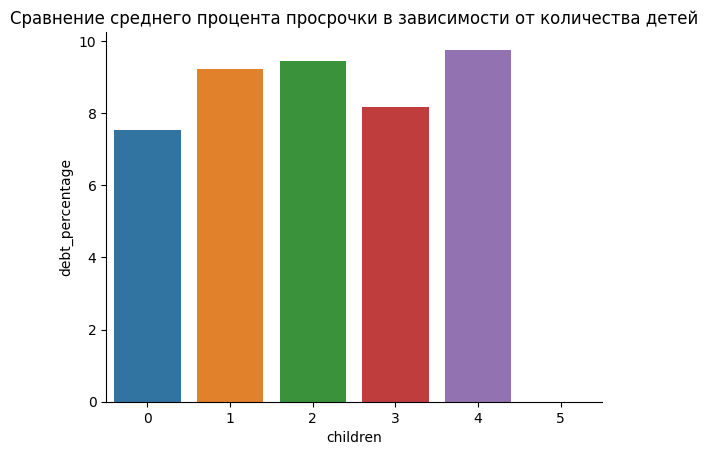

In [ ]:
sns.barplot(x=data_children_debt.index,y=data_children_debt['debt_percentage'])
plt.title('Сравнение среднего процента просрочки в зависимости от количества детей')
sns.despine()

In [ ]:
data[['debt','children']].corr()

,debt,children
debt,1.000000,0.024643
children,0.024643,1.000000


**Вывод.1:** Cильно бросается в глаза только доля непросроченных кредиторов у которых 5 детей. У людей без детей средняя платежеспособность. у людей с тремя детьми ситуация не сильн отличается ее скорре можно назватб пограничной. У людей же с 1,2 и 4 детьми есть проблемы с платежеспособностью. Закономерности в этой группе нет. **Однако** этот вывод актуален если не смотреть на размеры выборки.

Если же делать вывод учитывая размеры выборки, то из-за малых размеров выборки у когорт с 3, 4 и 5 детьми, то на лицо возрастающая последовательностб значений. На лицо корреляция что с увеличением количества детей у заемщика, повышается шанс невозврата кредита. Так что при переизбытке заемщиков предпочтение стоит отдавать заемщикам с малым количеством детей.

#### 3.2 Есть ли зависимость между семейным положением и возвратом кредита в срок?

In [ ]:
data.head(5)

,children,days_employed,dob_years,education,education_id,family_status,family_status_id,gender,income_type,debt,total_income,purpose,total_income_category,purpose_category
0,1,8437.673028,42,высшее,0,женат / замужем,0,F,сотрудник,0,253875,покупка жилья,B,операции с недвижимостью
1,1,4024.803754,36,среднее,1,женат / замужем,0,F,сотрудник,0,112080,приобретение автомобиля,C,операции с автомобилем
2,0,5623.422610,33,среднее,1,женат / замужем,0,M,сотрудник,0,145885,покупка жилья,C,операции с недвижимостью
3,3,4124.747207,32,среднее,1,женат / замужем,0,M,сотрудник,0,267628,дополнительное образование,B,получение образования
4,0,340266.072047,53,среднее,1,гражданский брак,1,F,пенсионер,0,158616,сыграть свадьбу,C,проведение свадьбы


In [ ]:
data['family_status'].unique()#---(1)
family_all=data.groupby('family_status')['debt'].count() #---(2)
family_negative=data.groupby('family_status')['debt'].sum()#---(3)
family_positive_=family_all-family_negative#---(4)
family_debt=family_positive_/family_all#---(5)
pd.DataFrame(family_debt.sort_values())

,debt
family_status,
Не женат / не замужем,0.902361
гражданский брак,0.906870
женат / замужем,0.924394
в разводе,0.929352
вдовец / вдова,0.933754


1)выведем на экран и узнам какие статутсы вообще есть:'женат / замужем', 'гражданский брак', 'вдовец / вдова','в разводе', 'Не женат / не замужем'
2)сгруппируем по семенйному положению:'женат / замужем', 'гражданский брак', 'вдовец / вдова','в разводе', 'Не женат / не замужем' с debt, где 1 - была просрочка по кредиту, 0 - не было -- посчитаем общее колличетво строк у заемщиков с разным семейным положением
3)сгруппируем по семенйному положению стоблец с debt -- посчитаем собщую сумму по debt у заемщиков с разным семейным положением - тогда мы получем сумму заемщиков у которых была просрочка по кредиту
4)так как в оперцаии 2 мы считали общее количество заемщиков, а в операции 3 нашли количество заемщиков у которых была просрочка по кредиту, то мы можем найти количетсво заемщиков у которых не было просрочки отняв от результата 2 операции 3ю.
5)найдем соотношение отдавших кредит в срок от всех заемщиков
6) выведем на экран

,sum,count,debt_percentage
family_status,,,
Не женат / не замужем,273,2796,9.76
гражданский брак,385,4134,9.31
женат / замужем,927,12261,7.56
в разводе,84,1189,7.06
вдовец / вдова,63,951,6.62


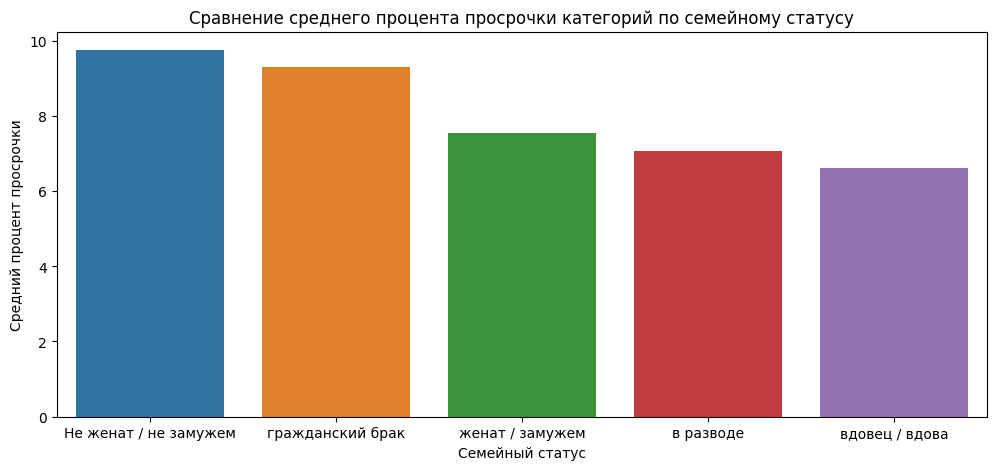

In [ ]:
data_family_status_debt = data.groupby('family_status').agg({'debt':['sum', 'count']})
#дополнительно рассчитаем процент должников для каждой группы
data_family_status_debt[('debt', 'debt_percentage')] = round(data_family_status_debt['debt']['sum']/data_family_status_debt['debt']['count']*100, 2)
data_family_status_debt.columns=['sum',	'count',	'debt_percentage']
data_family_status_debt=data_family_status_debt.sort_values(by = 'debt_percentage', ascending = False)
display(data_family_status_debt)


import matplotlib.pyplot as plt
plt.figure(figsize = (12, 5))
sns.barplot(x = data_family_status_debt.index, y = 'debt_percentage', data = data_family_status_debt)
plt.xlabel('Семейный статус')
plt.ylabel('Средний процент просрочки')
plt.title('Сравнение среднего процента просрочки категорий по семейному статусу')
plt.show()

In [ ]:
print(f'Средний показатель уровня просрочки по кредиту:  {round((1-family_debt.mean())*100,2)}')


Средний показатель уровня просрочки по кредиту:  8.07


**Вывод1:** Нужно обратить внимание на на опказатеди выше среднего, это: гражданский брак и люди вне брака - то есть на группы людей у которых еще не было официальных отношений - у них прецент просрочек по кредиту выше среднего. Выходит, что состоящие или состоявшие в браке заемщики более надежны.

#### 3.3 Есть ли зависимость между уровнем дохода и возвратом кредита в срок?

In [ ]:
len(data['total_income'].unique())#---(1)
income_level_all=data.groupby('total_income_category')['debt'].count()#---(2)
income_level_negative=data.groupby('total_income_category')['debt'].sum()#---(3)
income_level_positive=income_level_all-income_level_negative#---(4)
income_level_debt=income_level_positive/income_level_all#---(5)
pd.DataFrame(income_level_debt)#---(6)

,debt
total_income_category,
A,0.920000
B,0.929398
C,0.915018
D,0.939828
E,0.909091


1)если идти по прошлому алгоритму то не выйдет ничего хорошего для наших менеджеров: всего существует 18504 разных доходов. Значит лучше будет использовать следующие категории дохода из пункта 16:
1.000.001 и выше — 'A'.
200.001–1.000.000 — 'B';
50.001–200.000 — 'C';
30.001–50.000 — 'D';
0–30.000 — 'E';
2)сгруппируем по категории дохода:A, B, C, D и E с debt, где 1 - была просрочка по кредиту, 0 - не было -- посчитаем общее колличетво строк у заемщиков из разных категорий дохода
3)сгруппируем по категории дохода стоблец с debt -- посчитаем собщую сумму по debt у заемщиков из разных категорий дохода - тогда мы получем сумму заемщиков у которых была просрочка по кредиту
4)так как в оперцаии 2 мы считали общее количество заемщиков, а в операции 3 нашли количество заемщиков у которых была просрочка по кредиту, то мы можем найти количетсво заемщиков у которых не было просрочки отняв от результата 2 операции 3ю
5)найдем соотношение отдавших кредит в срок от всех заемщиков
6) выведем на экран

!!!логичной была бы гипотеза о том что при повышении доходы снижается процент невозврата


,sum,count,debt_percentage
total_income_category,,,
A,2,25,8.00
B,354,5014,7.06
C,1353,15921,8.50
D,21,349,6.02
E,2,22,9.09


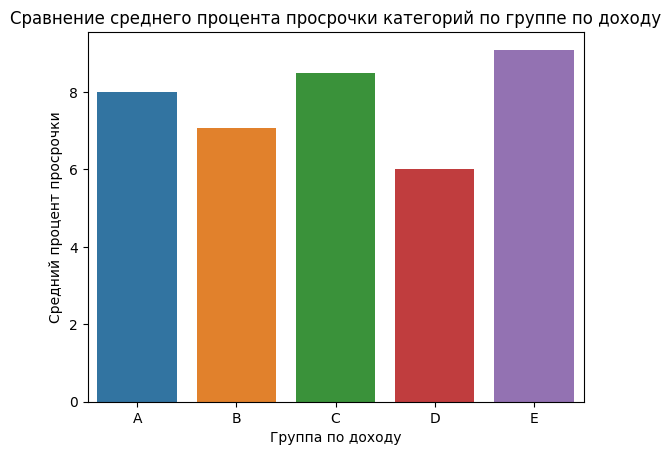

In [ ]:
data_level_debt = data.groupby('total_income_category').agg({'debt':['sum', 'count']})
#дополнительно рассчитаем процент должников для каждой группы
data_level_debt[('debt', 'debt_percentage')] = round(data_level_debt['debt']['sum']/data_level_debt['debt']['count']*100, 2)
data_level_debt=data_level_debt['debt']
display(data_level_debt)
sns.barplot(x=data_level_debt.index,y=data_level_debt['debt_percentage'])
plt.xlabel('Группа по доходу')
plt.ylabel('Средний процент просрочки')
plt.title('Сравнение среднего процента просрочки категорий по группе по доходу')
plt.show()

**Вывод:** 1.000.001 и выше — 'A'..... 200.001–1.000.000 — 'B'..... 50.001–200.000 — 'C'..... 30.001–50.000 — 'D'..... 0–30.000 — 'E'/.По графику видно, что знаечения отличаются не так сильно. НО в категриях A и B слишком мало значений что бы, можно репрезентовать эти выводы, тоже касается и значения D. Если же рассмотреть значени B и C - то есть катоегрии с хорошей выборокой - то можно сделать вывод о том что чем более заработок - тем платежеспособнее человек (закрывает кредиты без просрочек). НО как говорится нельзя построить график только по двум точкам (а это точно не линейная зависимость). Так что выявить зависимость тут не удалось по причине не хавтке данных либо ее тут нет. Логичнее 1 вариант.

**НО** если сравнить только две самые большие категории можно сказать что чем выше доход, тем заемщики лучше платят кредиты. Напрашивается рекомендация банку - изменить шкалу градации клиентов по доходам, для получения более сбалансированных выборок.

#### 3.4 Как разные цели кредита влияют на его возврат в срок?

In [ ]:
len(data['purpose'].unique())#---(1)
purpose_all=data.groupby('purpose_category')['debt'].count()#---(2)
purpose_negative=data.groupby('purpose_category')['debt'].sum()#---(3)
purpose_positive=purpose_all-purpose_negative#---(4)
purpose_debt=purpose_positive/purpose_all#---(5)
purpose_debt#---(6)

purpose_category
операции с автомобилем      0.906520
операции с недвижимостью    0.927449
получение образования       0.907472
проведение свадьбы          0.920882
Name: debt, dtype: float64

1)узнаем сколько уникальных целей кредита есть == 38 - это много для визуализции. Лучше воспользоваться результатом задания 18 - группой целей 2)сгруппируем по группам целей:
----операции с автомобилем',
----'операции с недвижимостью',
----'проведение свадьбы',
----'получение образования' с debt, где 1 - была просрочка по кредиту, 0 - не было -- посчитаем общее колличетво строк у заемщиков с разным целями 3)сгруппируем по целям стоблец с debt -- посчитаем собщую сумму по debt у заемщиков с разным целями - тогда мы получем сумму заемщиков у которых была просрочка по кредиту 4)так как в оперцаии 2 мы считали общее количество заемщиков, а в операции 3 нашли количество заемщиков у которых была просрочка по кредиту, то мы можем найти количетсво заемщиков у которых не было просрочки отняв от результата 2 операции 3ю. 5)найдем соотношение отдавших кредит в срок от всех заемщиков 6) выведем на экран

,sum,count,debt_percentage
purpose_category,,,
операции с автомобилем,400,4279,9.35
получение образования,369,3988,9.25
проведение свадьбы,183,2313,7.91
операции с недвижимостью,780,10751,7.26


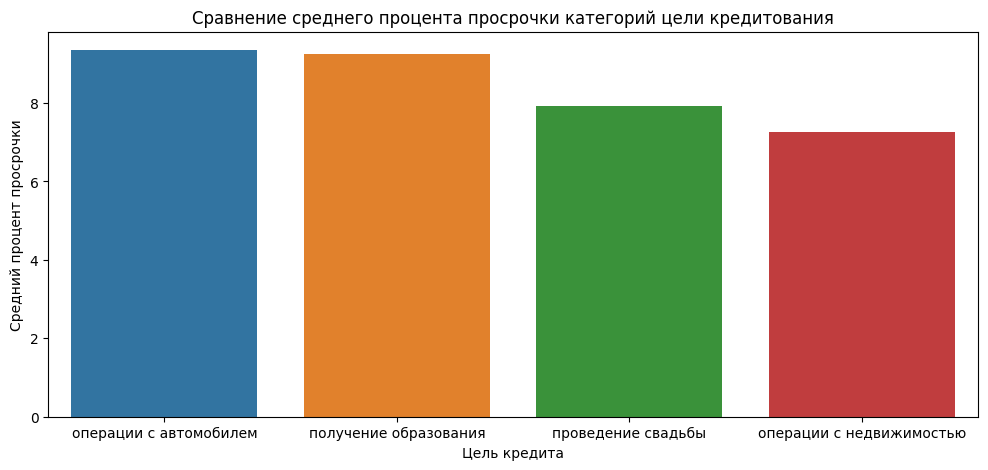

In [ ]:
data_purpose_debt = data.groupby('purpose_category').agg({'debt':['sum', 'count']})
#дополнительно рассчитаем процент должников для каждой группы
data_purpose_debt[('debt', 'debt_percentage')] = round(data_purpose_debt['debt']['sum']/data_purpose_debt['debt']['count']*100, 2)
data_purpose_debt=data_purpose_debt['debt'].sort_values(by='debt_percentage',ascending=False)
display(data_purpose_debt)
plt.figure(figsize = (12, 5))
sns.barplot(x=data_purpose_debt.index,y=data_purpose_debt['debt_percentage'])
plt.xlabel('Цель кредита')
plt.ylabel('Средний процент просрочки')
plt.title('Сравнение среднего процента просрочки категорий цели кредитования')
plt.show()

**Вывод1:** Судя по таблице выше среднего будут категории с целями: кредит на полуячения обрзования и кредит на автомобиль - них нужно обратить вниммание. А самыми проблемными выглядят автокредиты и кредиты на образование

#### 3.5 Приведите возможные причины появления пропусков в исходных данных.

*Ответ:* Факторы появления пропусков: либо человеческий фактор, либо технический.Причина может крыться в недостатке информации при заполнении, и/или ошибки при заполнении информации, иногда это может быть закономерная ошибка при обработке данных которая может снести часть данных

#### 3.6 Объясните, почему заполнить пропуски медианным значением — лучшее решение для количественных переменных.

*Ответ:* Заполнять пропуски в количественных данных медианным значением является лучшим решением, т.к. данное значение не приводит к аномалиям в данных и искажению исследования.
Вкратце - медиана менее чувствительна к выбросам
Использовать среднее арифметическое для этих целей будет ошибкой из-за возможных выбросов в данных, из-за которых "среднее" на самом деле не будет отражать усредненное состояние на основе большинства данных.

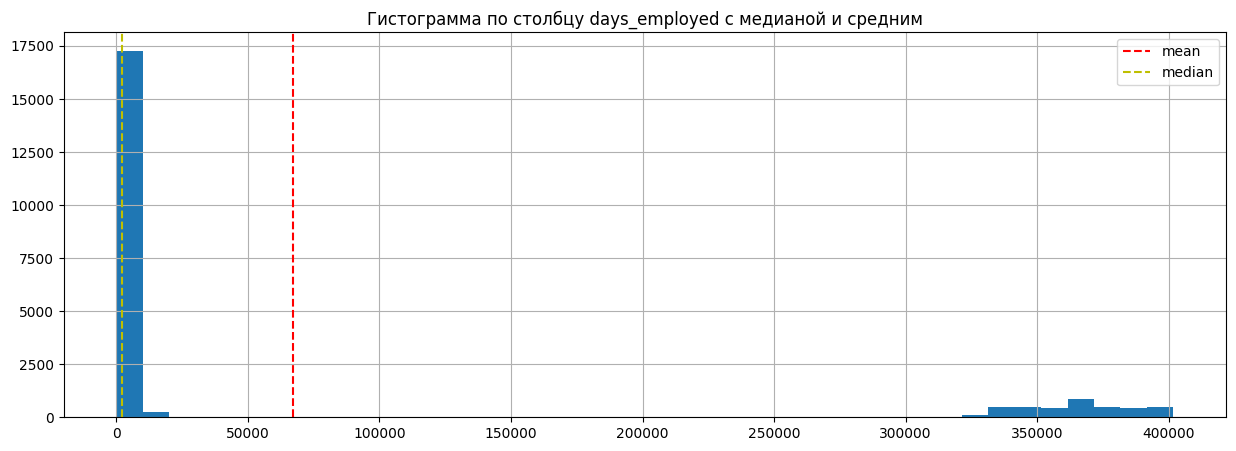

In [ ]:
plt.figure(figsize = (15,5))

ax = data['days_employed'].hist(bins = 40)

ax.axvline(x = data['days_employed'].mean(), color = 'r', linestyle = 'dashed', label = 'mean')
ax.axvline(x = data['days_employed'].median(), color = 'y', linestyle = 'dashed', label = 'median')
plt.legend()
plt.title('Гистограмма по столбцу days_employed с медианой и средним')
plt.show()

### Шаг 4: общий вывод.

Целью проекта было **Исследовать надежность заемщиков** для последующего учета результатов при построении модели кредитного скоринга.

Можно сделать обощающий вывод.

Отсутвиет зависимость между количеством детей и возвратом кредита в срок.
     Есть зависимость между семейным положением и возвратом кредита в срок.Кредиты, выданные заемщикам, которые не состоящили в официальных отношениях чаще попадают в просрочку.
Отсутвует зависимость между уровнем дохода и возвратом кредита в срок. Скорее всего не хавтает данные в некотрых категориях.
В результате анализа целей кредитования было выявлено, что кредиты, выданные на операции с автомобилями и на получение образования, чаще попадают в просрочку, чем остальные.

При построении модели кредитного скоринга следует обратить внимание на следующие факторы:

- Семейное положение заемщиков
- Цели кредита